___
# Ciência dos Dados - PROJETO 1

## Leonardo Bhering Gonçalves
___

## Acesso do Brasileiro à Intenet e ao Telefone Celular

___
## Introdução

Neste projeto você terá a oportunidade de conhecer como está o acesso dos brasileiros, que ganham até 10 mil reais, à internet e ao telefone celular pessoal. Farei uma analize, utilizando os dados da base de dados PNAD do IBGE de 2015, da quantidade de brasileiros que ainda não possuem acesso à internet ou a telefone celular próprio. Também irei comparar o acesso à internet e ao celular com faixas de renda da população.

___
## Filtros da base de dados

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from numpy import arange

In [12]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Leonardo\Documents\INSPER\CiDadosDP\Projetos\Projeto 1


In [13]:
dados_2015=pd.read_csv('PES2015.csv',sep=',')

In [14]:
#Filtrando a tabela para as variáveis necessárias
tab_reduzida = dados_2015.iloc[1:,[59,307]]
tab_reduzida.V06111 = tab_reduzida.V06111.astype('category')
tab_reduzida.V06111.cat.categories = ('Sim','Não')
tbI = tab_reduzida.rename(columns={"V06111":"Acessou Internet nos ultimos 3 meses"})
DADOSOFF=tbI.dropna(0,how='any')
dadosoff=DADOSOFF[DADOSOFF.V4720>0]
dadosoff1=dadosoff[dadosoff.V4720<10000]
tb = dadosoff.rename(columns={"V4720":"Rendimento Mensal"})
dfc = tab_reduzida.V06111.value_counts()
print('Tabela de acesso a internet e rendimento mensal')
tb.head(10)

Tabela de acesso a internet e rendimento mensal


,Acessou Internet nos ultimos 3 meses,Rendimento Mensal
1,Sim,1150.0
2,Sim,880.0
3,Sim,3000.0
7,Sim,880.0
8,Não,3500.0
9,Não,2300.0
10,Sim,1990.0
11,Não,700.0
14,Não,4000.0
16,Sim,1160.0


Esta é a tabela com a qual trabalharei. Na tabela, podemos observar o código da pessoa, se ela acessou a internet de alguma forma nos últimos 3 meses e o rendimento mensal dessa pessoa. A próxima tabela segue o mesmo padrão, mudando apenas de acesso a internet para a posse de telefone celular próprio ou não.

## Análise e Resultados

In [15]:
print('Quantidade de pessoas que tem acesso à internet e quantidade de pessoas que não tem acesso')
dfc

Quantidade de pessoas que tem acesso à internet e quantidade de pessoas que não tem acesso


Sim    177666
Não    130932
Name: V06111, dtype: int64

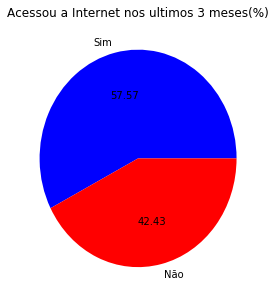

In [16]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
dfc.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False, title='Acessou a Internet nos ultimos 3 meses(%)')
plt.ylabel('')
plt.xlabel('')

Analisando o gráfico acima, podemos perceber que uma grande quantidade da população brasileira (42,43%) ainda não possui acesso a internet com frequência. Isso mostra o quão atrasado é o país em relação à entrega de tecnologias atuais a população mais carente.

In [17]:
#Filtrando a tabela para as variáveis necessárias
tab_reduzida2 = dados_2015.iloc[1:,[66,307]]
tab_reduzida2.V06112 = tab_reduzida2.V06112.astype('category')
tab_reduzida2.V06112.cat.categories = ('Sim','Não')
tbI2 = tab_reduzida2.rename(columns={"V06112":"Tem telefone celular para uso pessoal"})
DADOSOFF2=tbI2.dropna(0,how='any')
dadosoff2=DADOSOFF2[DADOSOFF2.V4720>0]
tb2 = dadosoff2.rename(columns={"V4720":"Rendimento Mensal"})
dfc2 = tab_reduzida2.V06112.value_counts()
print('Tabela de posse de celular pessoal e rendimento mensal')
tb2.head(10)

Tabela de posse de celular pessoal e rendimento mensal


,Tem telefone celular para uso pessoal,Rendimento Mensal
1,Sim,1150.0
2,Sim,880.0
3,Sim,3000.0
7,Sim,880.0
8,Sim,3500.0
9,Não,2300.0
10,Não,1990.0
11,Não,700.0
14,Sim,4000.0
16,Sim,1160.0


In [18]:
print('Quantidade de pessoas que possuem telefone celular para uso pessoal e que não possuem')
dfc2

Quantidade de pessoas que possuem telefone celular para uso pessoal e que não possuem


Sim    243443
Não     65155
Name: V06112, dtype: int64

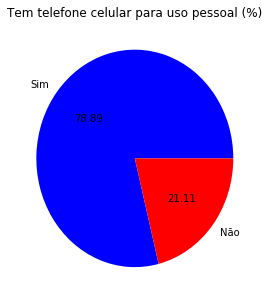

In [19]:
fig = plt.figure(figsize=(15, 5))
plt.subplot(131)
dfc2.plot(kind='pie', colors=('blue', 'red'), autopct="%0.2f",legend=False, title='Tem telefone celular para uso pessoal (%)')
plt.ylabel('')
plt.xlabel('')

Analisando o gráfico acima, podemos perceber que mais de um quinto da população (21,11%) ainda não possui um telefone celular para uso pessoal. Levando em conta que o celular foi inventado em 1973 pelo engenheiro eletrotécnico da Motorola, Martin Cooper, em pleno 2015 ter quase um quarto da população sem acesso a essa tecnologia mostra quão precariamente vive a população mais pobre do país.

In [20]:
dadosoff.V4720.describe()

count    2.169110e+05
mean     1.319896e+10
std      1.141263e+11
min      1.000000e+00
25%      7.880000e+02
50%      1.000000e+03
75%      1.800000e+03
max      1.000000e+12
Name: V4720, dtype: float64

In [22]:
#Criando as faixas de salário
faixas = pd.cut(dadosoff1.V4720, bins=10, right=False)
print('Faixas de salário:')
ut1 = (faixas.value_counts(sort=False, normalize=True)*100).round(decimals=1)
print(ut1,'\n')

Faixas de salário:
[1.0, 998.6)          48.4
[998.6, 1996.2)       30.1
[1996.2, 2993.8)      10.2
[2993.8, 3991.4)       4.8
[3991.4, 4989.0)       2.3
[4989.0, 5986.6)       1.8
[5986.6, 6984.2)       0.9
[6984.2, 7981.8)       0.7
[7981.8, 8979.4)       0.5
[8979.4, 9986.976)     0.2
Name: V4720, dtype: float64 



C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


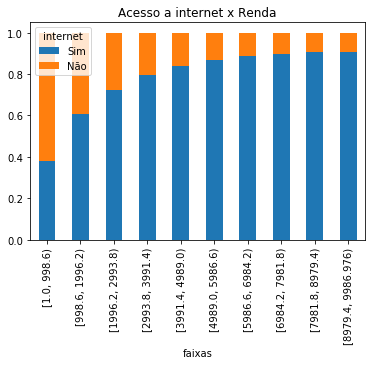

In [25]:
dadosoff1['faixas']=faixas

dadosoff['internet']=tab_reduzida.V06111
pd.crosstab(dadosoff1.faixas,dadosoff.internet, normalize='index').plot(kind='bar', stacked=True, title='Acesso a internet x Renda')

O gráfico apresentado acima nos possibilita concluir que a maioria da população mais pobre nn possui acesso a internet e que a quantidade de pessoas que possui acesso aumenta conforme aumenta conforme aumenta a renda das pessoas.

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


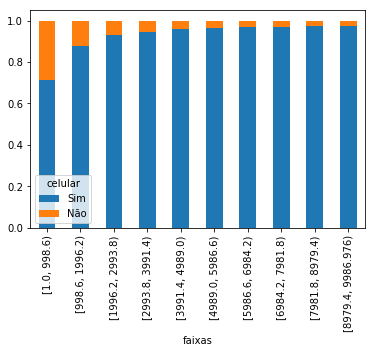

In [98]:
dadosoff2['celular']=tab_reduzida2.V06112
pd.crosstab(dadosoff.faixas,dadosoff2.celular, normalize='index').plot(kind='bar', stacked=True)

O gráfico apresentado acima nos possibilita concluir que apenas cerca de 70% da população mais pobre possui celular para uso pessoal. Também nos mostra que a quantidade de pessoas com posse de celular próprio aumenta conforme aumenta seus salários.

___
## Conclusão 

Descreva aqui suas conclusões!

Após análise dos dados da PNAD do IBGE e dos gráficos apresentados podemos concluir que a população mais pobre é a que mais demora a receber as novas, ou nem tão novas assim, tecnologias. Pudemos observar uma grande quantidade da população que ainda não possui acesso a internet (42,43%), sendo a maioria dessas pessoas com rendimento mensal de menos de 2 salários mínimos.
O mesmo acontece com a posse de telefone celular para uso pessoal, mais de um quinto (21,11%) da população não tem acesso a esse objeto tão essencial para a comunicação nos dias de hoje. Essas analises mostram como o brasil ainda está muito atrasado em disponibilizar tecnologias, básicas hoje em dia, para a população mais carente que parecem viver em outra década, sem internet e sem celular.